In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

### Passing Stats EDA

In [3]:
master_df = pd.read_csv("../data/cleaned/2016-2021_passing_stats.csv")

In [5]:
master_df.loc[master_df['won_super_bowl'] == 1]

,stats_type,year,Player,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate,1st,1st%,20+,40+,Lng,Sck,SckY,year_player,won_super_bowl
18,passing,2017,Carson Wentz,3296,7.5,440,265,0.602,33,7,101.9,160,0.364,40,9,72,28,162,2017_Carson Wentz,1
43,passing,2017,Nick Foles,537,5.3,101,57,0.564,5,2,79.5,29,0.287,3,0,35,5,44,2017_Nick Foles,1
56,passing,2017,Nate Sudfeld,134,5.8,23,19,0.826,0,0,90.9,4,0.174,0,0,16,3,24,2017_Nate Sudfeld,1
67,passing,2019,Patrick Mahomes,4031,8.3,484,319,0.659,26,5,105.3,176,0.364,50,15,83,17,127,2019_Patrick Mahomes,1
99,passing,2019,Matt Moore,659,7.2,91,59,0.648,4,0,100.9,35,0.385,9,3,57,8,65,2019_Matt Moore,1
117,passing,2021,Matthew Stafford,4886,8.1,601,404,0.672,41,17,102.9,233,0.388,65,18,79,30,243,2021_Matthew Stafford,1
177,passing,2020,Tom Brady,4633,7.6,610,401,0.657,40,12,102.2,233,0.382,63,12,50,21,143,2020_Tom Brady,1
242,passing,2018,Tom Brady,4355,7.6,570,375,0.658,29,11,97.7,205,0.360,53,8,63,21,147,2018_Tom Brady,1
311,passing,2016,Tom Brady,3554,8.2,432,291,0.674,28,2,112.2,163,0.377,45,8,79,15,87,2016_Tom Brady,1
333,passing,2016,Jimmy Garoppolo,502,8.0,63,43,0.683,4,0,113.3,22,0.349,7,0,37,3,15,2016_Jimmy Garoppolo,1


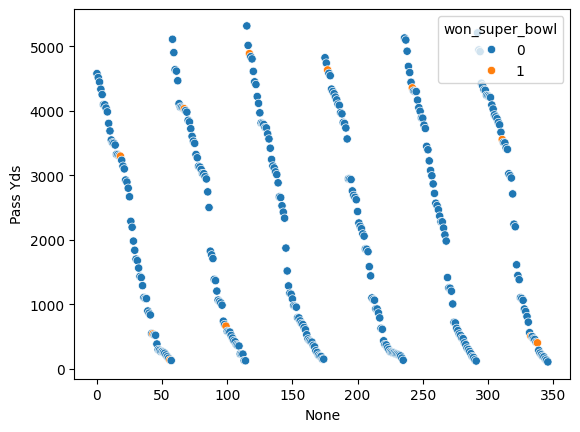

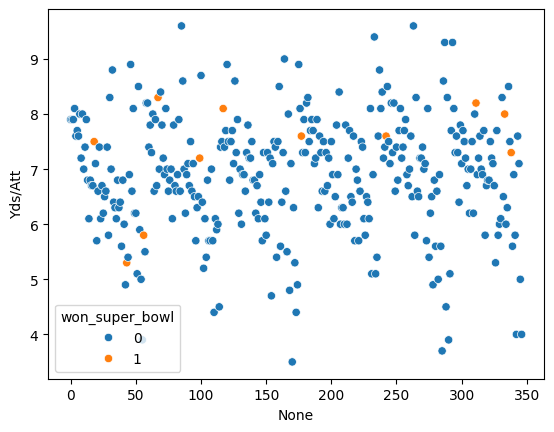

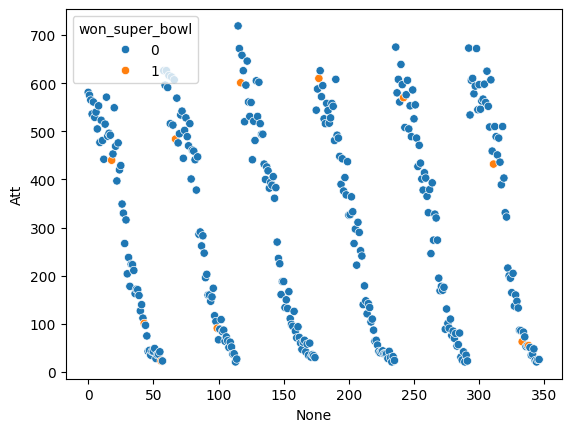

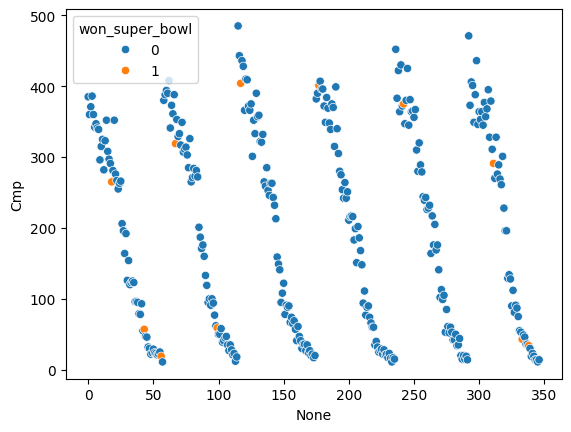

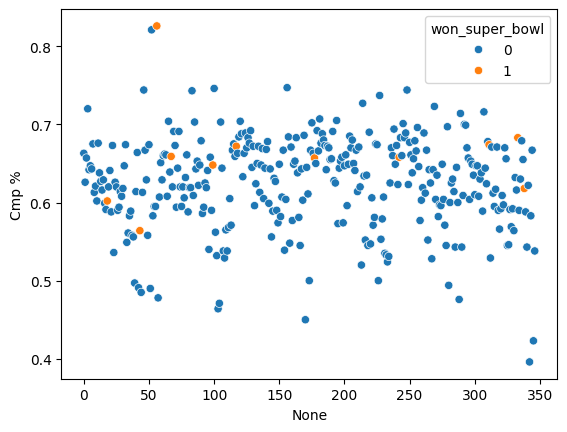

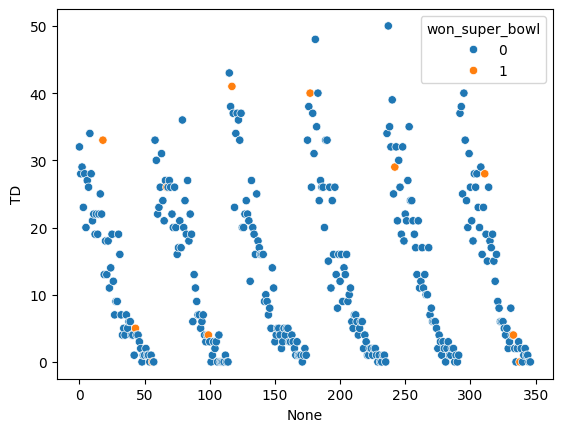

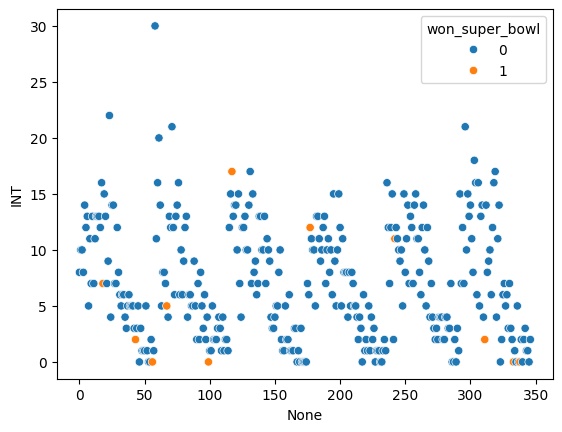

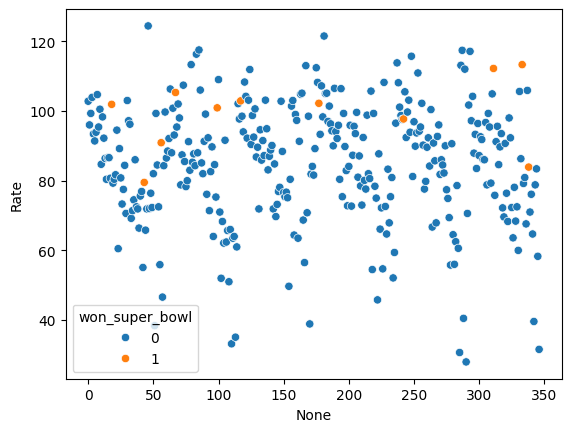

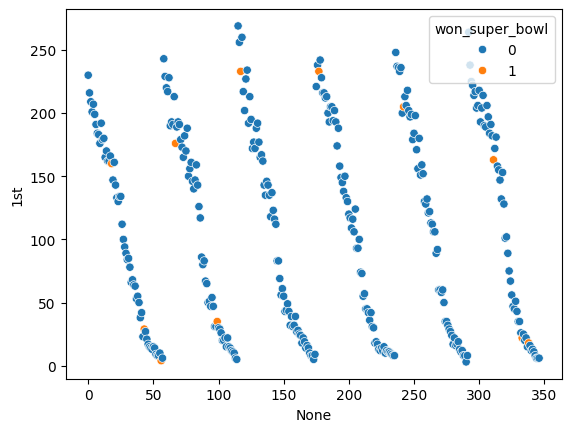

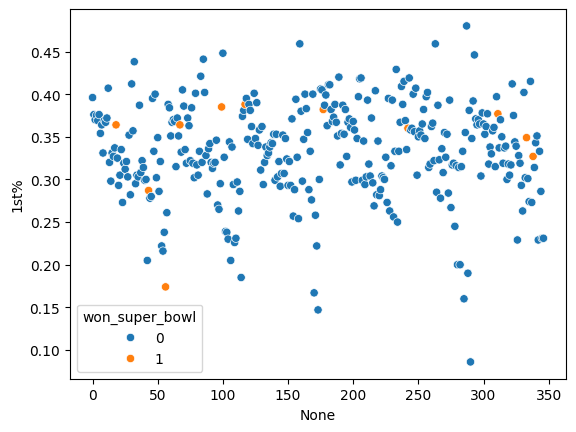

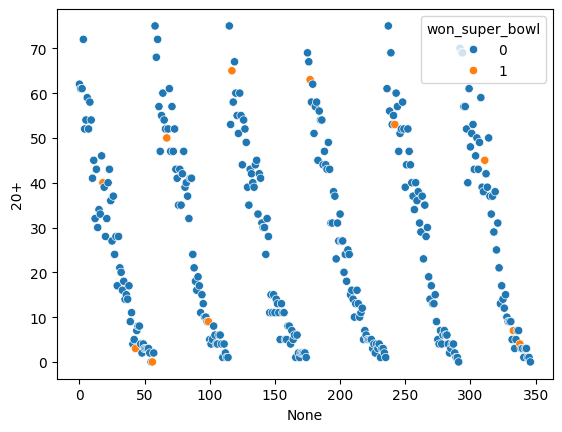

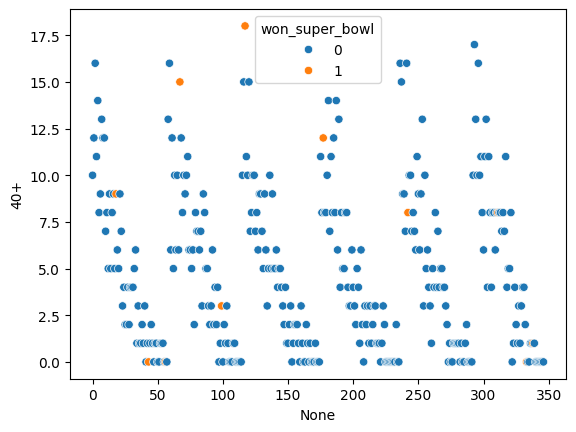

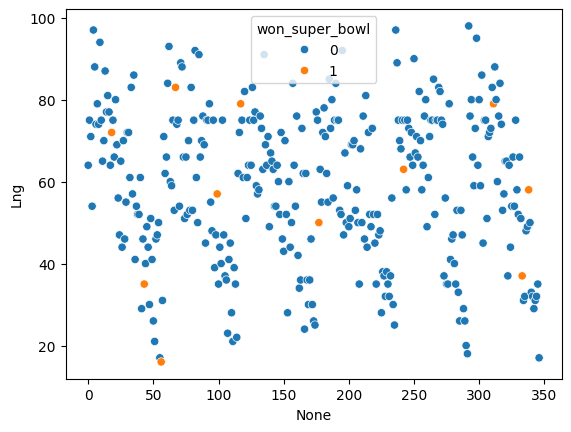

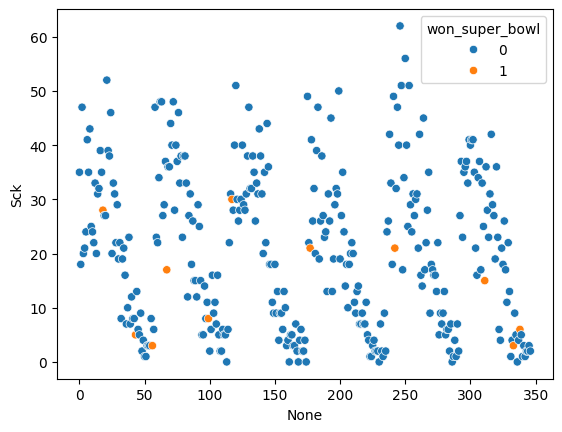

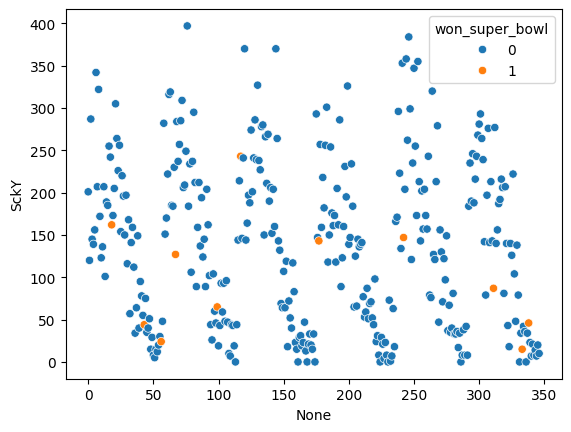

In [8]:
columns = ['Pass Yds', 'Yds/Att', 'Att', 'Cmp',
       'Cmp %', 'TD', 'INT', 'Rate', '1st', '1st%', '20+', '40+', 'Lng', 'Sck',
       'SckY']
for col in columns:
    sns.scatterplot(data=master_df, y=col, x=master_df.index, hue='won_super_bowl')
    plt.show()

In [9]:
all_passer_stats_grouped = master_df.groupby('year')[['Pass Yds', 'Yds/Att', 'Att', 'Cmp',
       'Cmp %', 'TD', 'INT', 'Rate']].mean().reset_index()
all_superbowl_winning_grouped = master_df.loc[master_df['won_super_bowl'] == True].groupby('year')[[
    'Pass Yds', 'Yds/Att', 'Att', 'Cmp','Cmp %', 'TD', 'INT', 'Rate']].mean().reset_index()

display(all_passer_stats_grouped)
display(all_superbowl_winning_grouped)

,year,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate
0,2016,2361.000000,6.927273,329.727273,207.981818,0.614855,14.090909,7.381818,84.192727
1,2017,2103.137931,6.756897,299.465517,186.172414,0.615862,12.689655,7.224138,82.751724
2,2018,2308.892857,7.014286,313.357143,203.553571,0.631804,14.875000,7.392857,86.235714
3,2019,2248.947368,6.892982,311.298246,197.701754,0.622053,13.842105,7.087719,83.864912
4,2020,2116.065574,7.003279,291.950820,190.852459,0.633311,14.065574,6.344262,86.745902
5,2021,2191.116667,6.808333,308.833333,200.333333,0.634550,13.900000,7.183333,87.405000


,year,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate
0,2016,1485.333333,7.833333,183.333333,122.666667,0.658333,10.666667,0.666667,103.133333
1,2017,1322.333333,6.200000,188.000000,113.666667,0.664000,12.666667,3.000000,90.766667
2,2018,4355.000000,7.600000,570.000000,375.000000,0.658000,29.000000,11.000000,97.700000
3,2019,2345.000000,7.750000,287.500000,189.000000,0.653500,15.000000,2.500000,103.100000
4,2020,4633.000000,7.600000,610.000000,401.000000,0.657000,40.000000,12.000000,102.200000
5,2021,4886.000000,8.100000,601.000000,404.000000,0.672000,41.000000,17.000000,102.900000


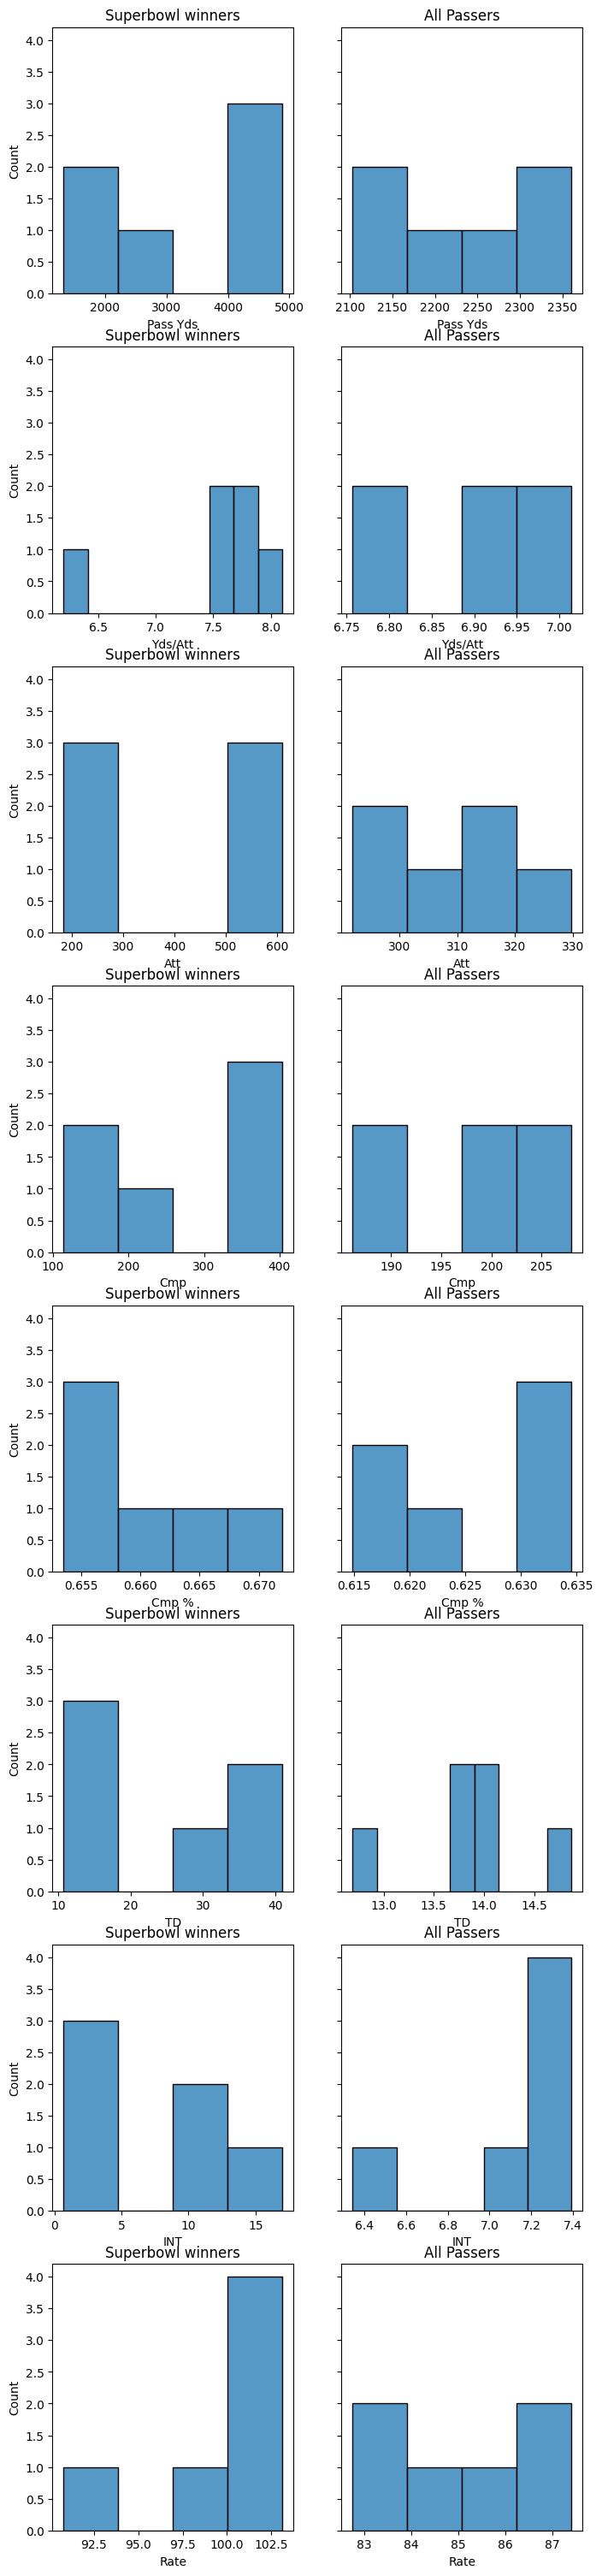

In [10]:
fig, ax = plt.subplots(len(all_superbowl_winning_grouped.drop(columns='year').columns), 2, 
                       figsize=(8, 38), sharey=True)

i = 0
for col in all_superbowl_winning_grouped.drop(columns='year').columns:
    ax[i, 0].set_title('Superbowl winners')
    sns.histplot(data=all_superbowl_winning_grouped, x=col, ax=ax[i, 0])
    ax[i, 1].set_title('All Passers')
    sns.histplot(data=all_passer_stats_grouped, x=col, ax=ax[i, 1])
    i += 1
plt.show()